In [143]:
from pykrx import stock


In [144]:
KOSPI = stock.get_market_ticker_list("20190225", market="KOSPI")
KOSDAQ = stock.get_market_ticker_list("20190225", market="KOSDAQ")



In [145]:
code = KOSDAQ[200]
print(code)

307750


In [146]:
name = stock.get_market_ticker_name(code)
df = stock.get_market_ohlcv("20220720", "20220810", code)

print(df.head(3))

              시가    고가    저가    종가      거래량       등락률
날짜                                                   
2022-07-20  9720  9950  9540  9580  3133070 -0.519211
2022-07-21  9570  9580  8970  9050  1625409 -5.532359
2022-07-22  9050  9130  8740  8790  1141877 -2.872928


In [147]:
from datetime import timedelta
from datetime import datetime

today = datetime.now().strftime("%Y%m%d")
day_before = datetime.now() - timedelta(days=90)
day_before = day_before.strftime("%Y-%m-%d")
day_before


df = stock.get_market_ohlcv(day_before,today, code)
print(len(df))



print(df.iloc[-40]['종가'])
print(df.iloc[-1]['종가'])


### 40일전 저거 대비 현재 등락률 
before_fourty_days_close = df.iloc[-40]['저가']
today_close = df.iloc[-1]['종가']
fluctuation = (today_close - before_fourty_days_close) / before_fourty_days_close * 100 
print(fluctuation)


### 14일 전 ~ 5일전 고가 대비 최근 저가
high_price = df.iloc[-14:-5]['고가'].max()

high_price_idx = df.iloc[-14:-5]['고가'].idxmax()

print(high_price)
print(high_price_idx)

after_signal = df[df.index>high_price_idx]
low_price = after_signal['저가'].min()
print(after_signal)
print(low_price)

threshold_fluctuation = (high_price - low_price ) / low_price * 100 

print(threshold_fluctuation)

current_price = df.iloc[-1]['종가']
print(current_price)

62
5950.0
5910.0
-0.5050505050505051
6460
2024-01-09 00:00:00
              시가    고가    저가    종가     거래량       등락률
날짜                                                  
2024-01-10  6440  6450  6250  6260  198061 -2.492212
2024-01-11  6260  6340  6250  6330  107354  1.118211
2024-01-12  6310  6330  6120  6170  274745 -2.527646
2024-01-15  6170  6170  6090  6130  127367 -0.648298
2024-01-16  6080  6230  6080  6100  119710 -0.489396
2024-01-17  6070  6100  5890  5910  221410 -3.114754
2024-01-18  5840  6000  5820  5890  119028 -0.338409
2024-01-19  5950  6010  5850  5900   98856  0.169779
2024-01-22  5900  5930  5850  5900  108139  0.000000
2024-01-23  5900  5960  5850  5910   64238  0.169492
5820
10.996563573883162
5910.0


In [148]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import plotly.graph_objects as go

df.rename(columns={'시가': 'Open', '고가': 'High', '저가': 'Low', '종가': 'Close', '거래량': 'Volume'}, inplace=True)
df['Date'] = mdates.date2num(df.index.to_pydatetime())
ohlc_data = df[['Date', 'Open', 'High', 'Low', 'Close']].values
volume_data = df['Volume']


In [162]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming 'df' is your DataFrame prepared for plotting
# Make sure your DataFrame's index is a datetime index

# Create a figure with subplots: 2 rows, 1 column
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.02, 
                    row_heights=[0.6,0.2,0.2])

# Add the candlestick plot in the first (top) subplot
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close']),
              row=1, col=1)

# Add the volume bar chart in the second (bottom) subplot
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], marker_color='blue'),
              row=3, col=1)

# Update layout of the figure
fig.update_layout(
    title=name,
    xaxis_title='',
    yaxis_title='가격',
    yaxis2_title='거래량',
    xaxis2_rangeslider_visible=False,
    showlegend=False,
    height=800
)

# Update axis labels for each subplot
fig.update_xaxes(title_text="date", row=3, col=1)
fig.update_yaxes(title_text="price", row=1, col=1)
fig.update_yaxes(title_text="volume", row=2, col=1)
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        # dict(values=["2023-12-25", "2024-01-01"])  # hide Christmas and New Year's
    ]
)
fig.show()


In [164]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming 'df' is your DataFrame prepared for plotting
# Ensure your DataFrame's index is a datetime index and does not contain missing dates

# Create a figure with subplots: 3 rows, 1 column
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.02, 
                    row_heights=[0.6, 0.2, 0.2])

# Add the candlestick plot in the first (top) subplot
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close']),
              row=1, col=1)

# Add the volume bar chart in the third (bottom) subplot
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], marker_color='blue'),
              row=3, col=1)

# Update layout of the figure
fig.update_layout(
    title=name ,  # Replace with your title
    xaxis_title='Date',
    yaxis_title='Price',
    yaxis2_title='Volume',
    xaxis2_rangeslider_visible=False,
    showlegend=False,
    height=800  # Plot height
)

# Update axis labels for each subplot
fig.update_xaxes(title_text="Date", row=3, col=1)
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        # dict(values=["2023-12-25", "2024-01-01"])  # hide Christmas and New Year's
    ]
)

# Show the figure
fig.show()


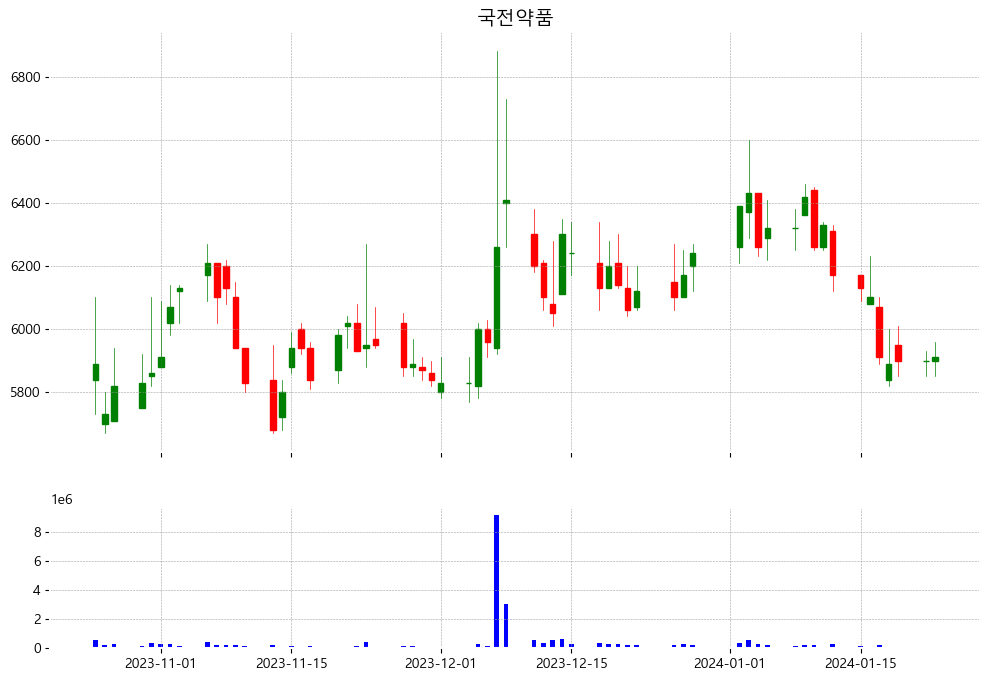

In [150]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import plotly.graph_objects as go



plt.rcParams['font.family'] = 'Malgun Gothic'

# Assuming 'df' is your DataFrame prepared for plotting
df.rename(columns={'시가': 'Open', '고가': 'High', '저가': 'Low', '종가': 'Close', '거래량': 'Volume'}, inplace=True)
# Convert dates to matplotlib's date format
df['Date'] = mdates.date2num(df.index.to_pydatetime())
ohlc_data = df[['Date', 'Open', 'High', 'Low', 'Close']].values
volume_data = df['Volume']

# Create two subplots - one for candlestick, one for volume
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})



# Plot the candlestick chart
candlestick_ohlc(ax1, ohlc_data, width=0.6, colorup='green', colordown='red')

# Plot the volume
ax2.bar(df['Date'], volume_data, width=0.5, color='blue')

# Set title with Korean characters
ax1.set_title(name, fontsize=14)

# Formatting the x-axis for dates
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set x-axis labels to visible for the bottom subplot
plt.setp(ax2.get_xticklabels(), visible=True)

plt.show()


c:\Users\pari0\anaconda3\envs\simulator\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.

c:\Users\pari0\anaconda3\envs\simulator\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.

c:\Users\pari0\anaconda3\envs\simulator\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.

c:\Users\pari0\anaconda3\envs\simulator\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.



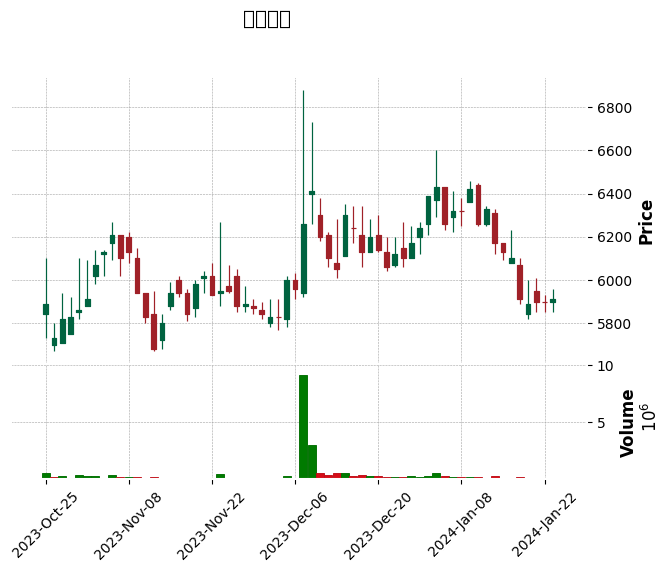

In [151]:
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

df.rename(columns={'시가': 'Open', '고가': 'High', '저가': 'Low', '종가': 'Close', '거래량': 'Volume'}, inplace=True)

df.head() 

# Plotting the OHLCV chart
mpf.plot(df, type='candle', style='charles',
         title=f"{name}",
         ylabel='Price',
         ylabel_lower='Volume',
         volume=True)


In [1]:
(3000 - 2315) / 2315 * 100

29.589632829373652